In [10]:
import importlib
import ipl
importlib.reload(ipl)
from ipl import ImageProcessor
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
print(cv2.__version__)
ip = ImageProcessor()

4.12.0


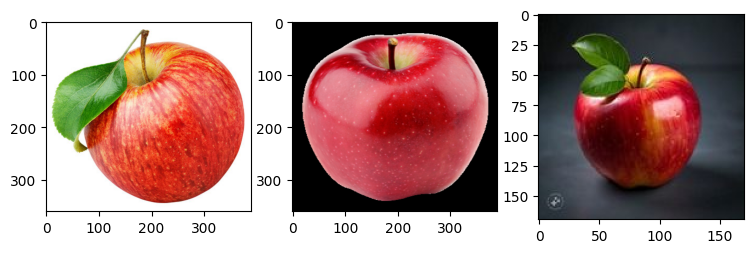

In [11]:
img1 = cv2.imread('../data/raw/Apple/Fresh/apple_fresh_001.jpg (1).jpg')
img2 = cv2.imread('../data/raw/Apple/Fresh/apple_fresh_001.jpg (1).png')
img3 = cv2.imread('../data/raw/Apple/Fresh/apple_fresh_001.jpg (93).jpg')
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

fig, ax = plt.subplots(1, 3, figsize=(9, 3))
ax[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax[2].imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.show()

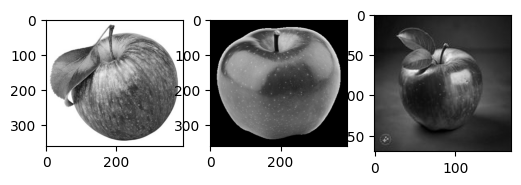

In [12]:
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img3_gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

fig, ax = plt.subplots(1, 3, figsize=(6, 3))
ax[0].imshow(img1_gray, cmap='gray')
ax[1].imshow(img2_gray, cmap='gray')
ax[2].imshow(img3_gray, cmap='gray')
plt.show()

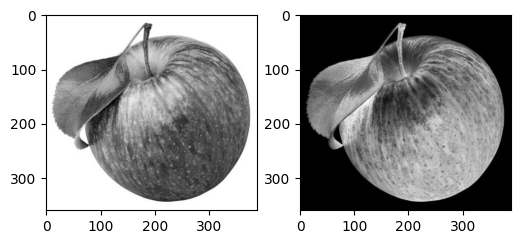

In [13]:
img1_negative = ip.image_negative(img1_gray)

fig, ax = plt.subplots(1, 2, figsize=(6, 3))
ax[0].imshow(img1_gray, cmap='gray')
ax[1].imshow(img1_negative, cmap='gray')
plt.show()

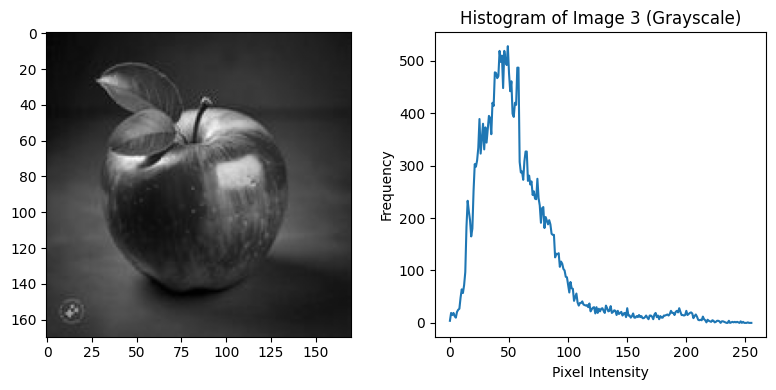

In [14]:
hist = ip.compute_histogram(img3_gray)
fig, ax = plt.subplots(1,2, figsize=(8, 4))
ax[0].imshow(img3_gray, cmap='gray')
ax[1].plot(hist)
ax[1].set_title('Histogram of Image 3 (Grayscale)')
ax[1].set_xlabel('Pixel Intensity')
ax[1].set_ylabel('Frequency')
fig.set_tight_layout(True)
plt.show()

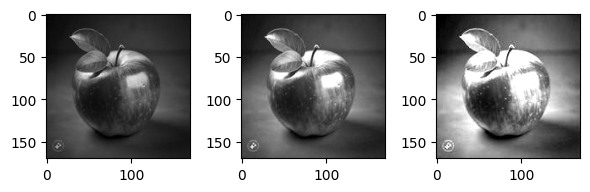

In [15]:
img_contrast = cv2.convertScaleAbs(img3_gray, alpha=1.5, beta=0)
img_contrast1 = ip.contrast_stretching(img3_gray, r1=10, s1=0, r2=100, s2=255)
fig, ax = plt.subplots(1, 3, figsize=(6, 3))
ax[0].imshow(img3_gray, cmap='gray')
ax[1].imshow(img_contrast, cmap='gray')
ax[2].imshow(img_contrast1, cmap='gray')
fig.set_tight_layout(True)
plt.show()

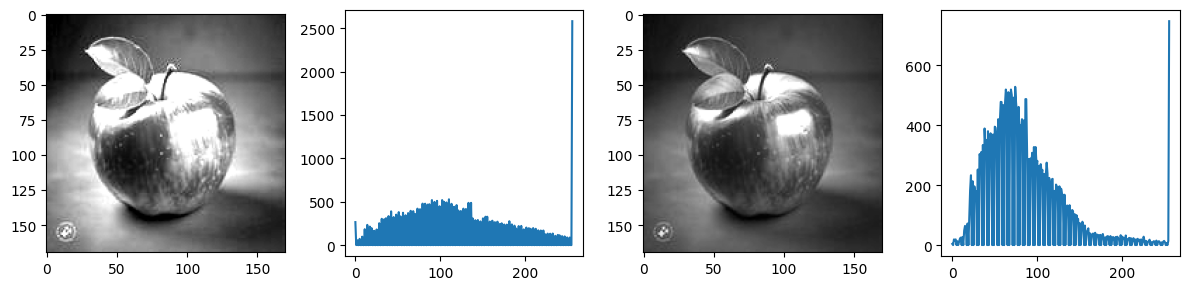

In [24]:
fig, ax = plt.subplots(1, 4, figsize=(12, 3))
hist = cv2.calcHist([img_contrast1], [0], None, [256], [0,256])
ax[0].imshow(img_contrast1, cmap='gray')
ax[1].plot(hist)
hist = ip.compute_histogram(img_contrast)
ax[2].imshow(img_contrast, cmap='gray')
ax[3].plot(hist)
fig.set_tight_layout(True)
plt.show()

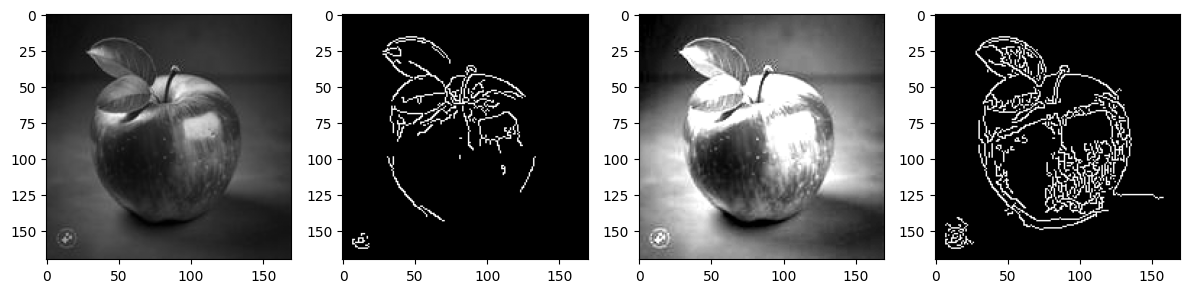

In [17]:
img_detected = cv2.Canny(img3_gray, 100, 200)
img_detected1 = cv2.Canny(img_contrast1, 50, 200)
fig, ax = plt.subplots(1, 4, figsize=(12, 3))
ax[0].imshow(img3_gray, cmap='gray')
ax[1].imshow(img_detected, cmap='gray')
ax[2].imshow(img_contrast1, cmap='gray')
ax[3].imshow(img_detected1, cmap='gray')
fig.set_tight_layout(True)
plt.show()

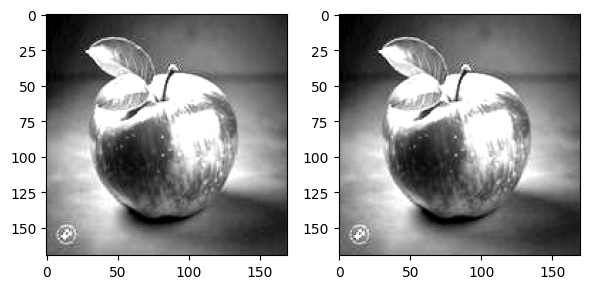

In [18]:
img_contrast2 = ip.contrast_stretching_lookup(img3_gray, r1=10, s1=0, r2=100, s2=255)
fig, ax = plt.subplots(1, 2, figsize=(6, 3))
ax[0].imshow(img_contrast1, cmap='gray')
ax[1].imshow(img_contrast2, cmap='gray')
fig.set_tight_layout(True)
plt.show()